### IMPORT MODULES

In [1]:
import numpy as np
import pandas as pd
import math
import sys, os
sys.path.append(os.path.abspath(os.path.join('../scripts/')))
from clean_dataframe import CleanTelco
from plot_dataframe import PlotDataFrame

In [2]:
#Initialize CleanTelco instance
df_cleaner = CleanTelco()
#Initialize Plot helper
my_plt = PlotDataFrame()
#Load data
df_telco = pd.read_csv("../data/data_source.csv", na_values=['undefined'])
df_telco

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


#### Reading the field description file

In [3]:
df_telco_field_description = pd.read_excel("../data/field_descriptions.xlsx")
df_telco_field_description

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)
2,Start,Start time of the xDR (first frame timestamp)
3,Start ms,Milliseconds offset of start time for the xDR ...
4,End,End time of the xDR (last frame timestamp)
5,End ms,Milliseconds offset of end time of the xDR (la...
6,Dur. (s),Total Duration of the xDR (in s)
7,IMSI,International Mobile Subscriber Identity
8,MSISDN/Number,MS International PSTN/ISDN Number of mobile - ...
9,IMEI,International Mobile Equipment Identity


### General Information

In [4]:
df_telco.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [5]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

#### Descriptive statistics for numerical columns

In [6]:
df_telco.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


### Data Cleaning

In [7]:
df_telco.shape

(150001, 55)

In [8]:
df_telco_field_description.shape
#As we can see there is one extra column included in the description file that is not present in our dataframe representing the data.

(56, 2)

In [9]:
df_concat = pd.concat([ pd.Series(df_telco.columns.tolist()), df_telco_field_description['Fields']], axis=1)
df_concat.rename(columns={0: 'dataframe', 'Fields': 'description file'}, inplace=True)
df_concat
#As we can see below the extra column name was 'Dur. (ms)' at index 1.

,dataframe,description file
0,Bearer Id,bearer id
1,Start,Dur. (ms)
2,Start ms,Start
3,End,Start ms
4,End ms,End
5,Dur. (ms),End ms
6,IMSI,Dur. (s)
7,MSISDN/Number,IMSI
8,IMEI,MSISDN/Number
9,Last Location Name,IMEI


In [10]:
df_telco[['Dur. (ms)', 'Dur. (ms).1']]
#Further investigation to check which measurment is in correct form
#As we can see Dur.(ms) is measured in seconds but named as if it was measured in microseconds(ms)

,Dur. (ms),Dur. (ms).1
0,1823652.0,1.823653e+09
1,1365104.0,1.365104e+09
2,1361762.0,1.361763e+09
3,1321509.0,1.321510e+09
4,1089009.0,1.089009e+09
...,...,...
149996,81230.0,8.123076e+07
149997,97970.0,9.797070e+07
149998,98249.0,9.824953e+07
149999,97910.0,9.791063e+07


In [11]:
df_telco.rename(columns={'Dur. (ms)': 'Dur (s)', 'Dur. (ms).1': 'Dur (ms)'}, inplace=True)
df_telco.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur (s)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur (ms)',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Med

#### Clean missing values

In [12]:
df_telco_missing = df_cleaner.get_missing_values(df_telco)
df_telco_missing
#View all the missing values in percentage

,column_name,percent_missing
Youtube DL (Bytes),Youtube DL (Bytes),0.000000
Other UL (Bytes),Other UL (Bytes),0.000000
Other DL (Bytes),Other DL (Bytes),0.000000
Gaming UL (Bytes),Gaming UL (Bytes),0.000000
Gaming DL (Bytes),Gaming DL (Bytes),0.000000
Netflix UL (Bytes),Netflix UL (Bytes),0.000000
Netflix DL (Bytes),Netflix DL (Bytes),0.000000
Youtube UL (Bytes),Youtube UL (Bytes),0.000000
Email UL (Bytes),Email UL (Bytes),0.000000
Email DL (Bytes),Email DL (Bytes),0.000000


In [13]:
#It is recommended to remove columns with more than 30% of missing values
df_telco_cols_to_remove = df_telco_missing[df_telco_missing['percent_missing'] >= 30].index.tolist()
df_telco_cols_to_remove

['HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'TCP DL Retrans. Vol (Bytes)',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'TCP UL Retrans. Vol (Bytes)',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 37500B < Vol UL']

In [14]:
df_telco_cols_to_remove = [col for col in df_telco_cols_to_remove if col not in ['TCP UL Retrans. Vol (Bytes)',
    'TCP DL Retrans. Vol (Bytes)']]
df_telco_cols_to_remove
#Since we will use TCP variables for later analysis we opt to fill them accordingly than removing the column. 

['HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 37500B < Vol UL']

In [15]:
df_telco_clean = df_telco.drop(df_telco_cols_to_remove, axis=1)
df_telco_clean.shape

(150001, 47)

In [16]:
df_telco_missing = df_cleaner.get_missing_values(df_telco_clean)
df_telco_missing
#We still have plenty missing values in TCP variables 

,column_name,percent_missing
Social Media UL (Bytes),Social Media UL (Bytes),0.000000
Netflix DL (Bytes),Netflix DL (Bytes),0.000000
Netflix UL (Bytes),Netflix UL (Bytes),0.000000
Youtube DL (Bytes),Youtube DL (Bytes),0.000000
Email UL (Bytes),Email UL (Bytes),0.000000
Gaming DL (Bytes),Gaming DL (Bytes),0.000000
Gaming UL (Bytes),Gaming UL (Bytes),0.000000
Other DL (Bytes),Other DL (Bytes),0.000000
Youtube UL (Bytes),Youtube UL (Bytes),0.000000
Other UL (Bytes),Other UL (Bytes),0.000000


In [17]:
df_cleaner.fix_missing_bfill(df_telco_clean, 'TCP DL Retrans. Vol (Bytes)')
df_cleaner.fix_missing_bfill(df_telco_clean, 'TCP UL Retrans. Vol (Bytes)')
#Since the TCP variables has high percentage of missing values, we can not impute them with median or mean which means making the majority values
# equal to a single value because our data will be heavily biased. So the right way is to use forward fill technique or backward fill technique.
# We will use backward fill technique 

,Bearer Id,Start,Start ms,End,End ms,Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [18]:
print(f"Avg RTT DL (ms) {df_telco_clean['Avg RTT DL (ms)'].skew(skipna=True)}")
print(f"Avg RTT UL (ms) {df_telco_clean['Avg RTT UL (ms)'].skew(skipna=True)}")


Avg RTT DL (ms) 62.90782807995961
Avg RTT UL (ms) 28.45741458546382


In [19]:
df_cleaner.fix_missing_ffill(df_telco_clean, 'Avg RTT DL (ms)')
df_cleaner.fix_missing_ffill(df_telco_clean, 'Avg RTT UL (ms)')

#We can see that both columns 'Avg RTT UL (ms)' and 'Avg RTT DL (ms)' are heavily skewed positively,
# since it is not advisable to fill the missing values with their mean. We will use forward fill technique

,Bearer Id,Start,Start ms,End,End ms,Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [20]:
df_telco_missing = df_cleaner.get_missing_values(df_telco_clean)
df_telco_missing

,column_name,percent_missing
Email UL (Bytes),Email UL (Bytes),0.000000
Gaming DL (Bytes),Gaming DL (Bytes),0.000000
Netflix UL (Bytes),Netflix UL (Bytes),0.000000
Avg RTT UL (ms),Avg RTT UL (ms),0.000000
Avg RTT DL (ms),Avg RTT DL (ms),0.000000
Email DL (Bytes),Email DL (Bytes),0.000000
Netflix DL (Bytes),Netflix DL (Bytes),0.000000
Other DL (Bytes),Other DL (Bytes),0.000000
Youtube UL (Bytes),Youtube UL (Bytes),0.000000
Youtube DL (Bytes),Youtube DL (Bytes),0.000000


In [21]:
df_cleaner.fix_missing_value(df_telco_clean, 'Handset Type', 'unknown')
df_cleaner.fix_missing_value(df_telco_clean, 'Handset Manufacturer', 'unknown')
#Since both columns 'Handset Manufacturer' and 'Handset Type' are not numerical types we can not use the methods like forward fill or 
# any of the methods like filling missing values using mean or median, all these methods apply for numerical data.

,Bearer Id,Start,Start ms,End,End ms,Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [22]:
df_telco_clean.dropna(inplace=True)
#Dropping rows having missing values

##### Type conversion

In [23]:
df_telco_clean.head()

,Bearer Id,Start,Start ms,End,End ms,Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [24]:
df_telco_clean.dtypes
# We can see that columns 'Start' and 'End" can be converted to pandas datetime

Bearer Id                         float64
Start                              object
Start ms                          float64
End                                object
End ms                            float64
Dur (s)                           float64
IMSI                              float64
MSISDN/Number                     float64
IMEI                              float64
Last Location Name                 object
Avg RTT DL (ms)                   float64
Avg RTT UL (ms)                   float64
Avg Bearer TP DL (kbps)           float64
Avg Bearer TP UL (kbps)           float64
TCP DL Retrans. Vol (Bytes)       float64
TCP UL Retrans. Vol (Bytes)       float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    float64
UL TP > 300 Kbps (%)              

In [25]:
df_telco_clean = df_cleaner.convert_to_datetime(df_telco_clean, 'Start')
df_telco_clean = df_cleaner.convert_to_datetime(df_telco_clean, 'End')

In [26]:
df_telco_clean = df_cleaner.convert_to_integer(df_telco_clean, 'Bearer Id')
df_telco_clean = df_cleaner.convert_to_integer(df_telco_clean, 'IMSI')
df_telco_clean = df_cleaner.convert_to_integer(df_telco_clean, 'IMEI')
df_telco_clean = df_cleaner.convert_to_integer(df_telco_clean, 'MSISDN/Number')
#Converting unique identification columns from float to int

In [27]:
df_telco_clean = df_cleaner.convert_to_string(df_telco_clean, 'Last Location Name')
df_telco_clean = df_cleaner.convert_to_string(df_telco_clean, 'Handset Manufacturer')
df_telco_clean = df_cleaner.convert_to_string(df_telco_clean, 'Handset Type')
#Converting name and type columns from type object to string

In [28]:
df_telco_clean.dtypes

Bearer Id                                  int64
Start                             datetime64[ns]
Start ms                                 float64
End                               datetime64[ns]
End ms                                   float64
Dur (s)                                  float64
IMSI                                       int64
MSISDN/Number                              int64
IMEI                                       int64
Last Location Name                        string
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
TCP DL Retrans. Vol (Bytes)              float64
TCP UL Retrans. Vol (Bytes)              float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%) 

#### Drop Duplicates

In [29]:
df_telco_clean = df_cleaner.drop_duplicate(df_telco_clean)
df_telco_clean.shape

(146887, 47)

In [30]:
df = df_telco_clean[['Dur (s)', 'Dur (ms)']].copy()
df['Dur (ms)'] = df['Dur (ms)'] * 1/1000
df['comparison'] = (df['Dur (s)'] == df['Dur (ms)'].apply(math.floor))
print(all(df['comparison']))
#Checking if Dur (ms) holds the same value as Dur (s) interms of measurement 


True


In [31]:
df_telco_clean = df_cleaner.drop_column(df_telco_clean, 'Dur (s)')

#### Handle Outliers

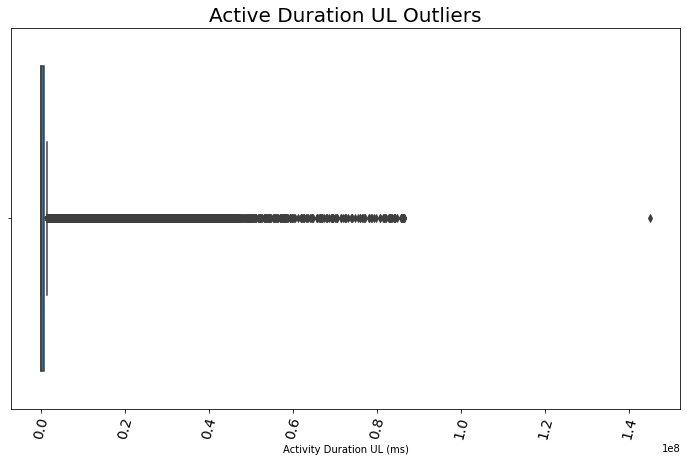

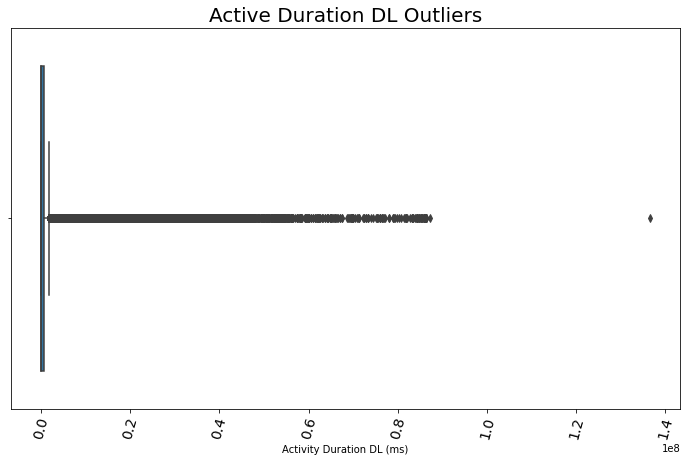

In [33]:
my_plt.box(df_telco_clean, 'Activity Duration UL (ms)', 'Active Duration UL Outliers')
my_plt.box(df_telco_clean, 'Activity Duration DL (ms)', 'Active Duration DL Outliers')

In [34]:
df_telco_clean = df_cleaner.fix_outliers(df_telco_clean)

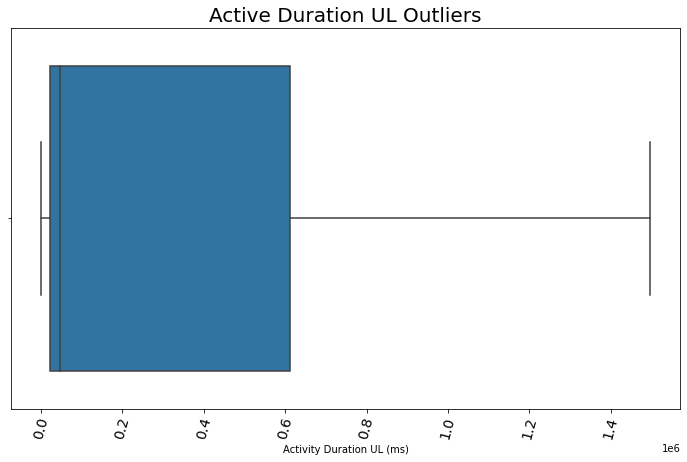

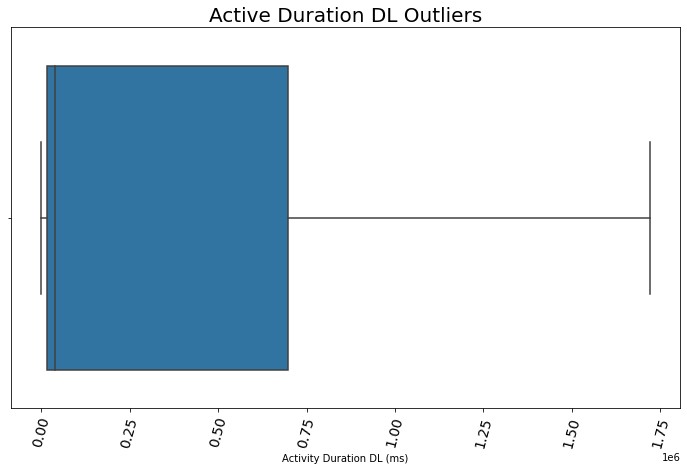

In [36]:
my_plt.box(df_telco_clean, 'Activity Duration UL (ms)', 'Active Duration UL Outliers')
my_plt.box(df_telco_clean, 'Activity Duration DL (ms)', 'Active Duration DL Outliers')

### Combining Download(DL) and Upload(UL) Columns

In [37]:
df_telco_clean['Social Media Data Volume (Bytes)'] = df_telco_clean['Social Media UL (Bytes)'] + df_telco_clean['Social Media DL (Bytes)']
df_telco_clean['Google Data Volume (Bytes)'] = df_telco_clean['Google UL (Bytes)'] + df_telco_clean['Google DL (Bytes)']
df_telco_clean['Email Data Volume (Bytes)'] = df_telco_clean['Email UL (Bytes)'] + df_telco_clean['Email DL (Bytes)']
df_telco_clean['Youtube Data Volume (Bytes)'] = df_telco_clean['Youtube UL (Bytes)'] + df_telco_clean['Youtube DL (Bytes)']
df_telco_clean['Netflix Data Volume (Bytes)'] = df_telco_clean['Netflix UL (Bytes)'] + df_telco_clean['Netflix DL (Bytes)']
df_telco_clean['Gaming Data Volume (Bytes)'] = df_telco_clean['Gaming UL (Bytes)'] + df_telco_clean['Gaming DL (Bytes)']
df_telco_clean['Other Data Volume (Bytes)'] = df_telco_clean['Other UL (Bytes)'] + df_telco_clean['Other DL (Bytes)']
df_telco_clean['Total Data Volume (Bytes)'] = df_telco_clean['Total UL (Bytes)'] + df_telco_clean['Total DL (Bytes)']


In [38]:
df_telco_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146887 entries, 0 to 149995
Data columns (total 54 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Bearer Id                         146887 non-null  int64         
 1   Start                             146887 non-null  datetime64[ns]
 2   Start ms                          146887 non-null  float64       
 3   End                               146887 non-null  datetime64[ns]
 4   End ms                            146887 non-null  float64       
 5   IMSI                              146887 non-null  int64         
 6   MSISDN/Number                     146887 non-null  int64         
 7   IMEI                              146887 non-null  int64         
 8   Last Location Name                146887 non-null  string        
 9   Avg RTT DL (ms)                   146887 non-null  float64       
 10  Avg RTT UL (ms)                 

In [39]:
df_telco_clean.to_csv('../data/cleaned_telco_data.csv')

### Univariant Analysis

#### Dur (ms)

In [40]:
df_telco_clean[['Dur (ms)']].describe()

,Dur (ms)
count,1.468870e+05
mean,1.001894e+08
std,5.898822e+07
min,7.142988e+06
25%,5.852686e+07
50%,8.639999e+07
75%,1.331594e+08
max,2.451082e+08


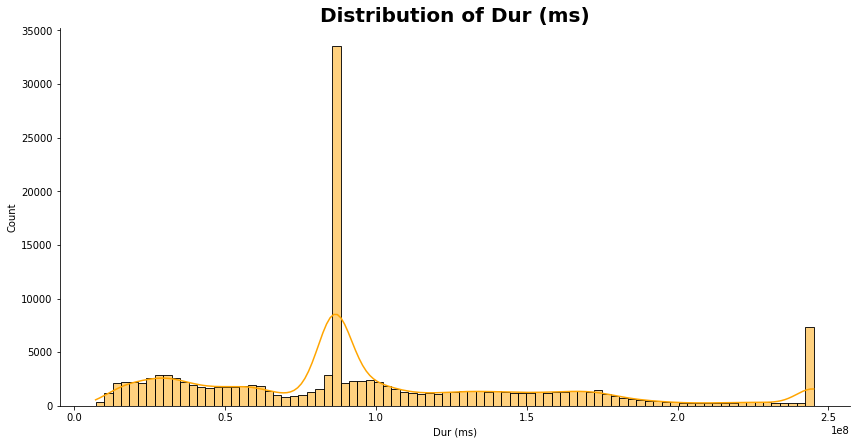

In [42]:
my_plt.hist(df_telco_clean, 'Dur (ms)', 'orange')

#### Handset Manufacturer

In [51]:
df_hand_set_man_counts = df_telco_clean['Handset Manufacturer'].value_counts()
df_hand_set_man_counts

Apple                                    59069
Samsung                                  39902
Huawei                                   33754
unknown                                   8820
Sony Mobile Communications Ab              925
                                         ...  
Sintave Technology (Group) Co Ltd            1
ZyXEL Communications Corp                    1
Shenzhen Sprocomm Technologies Co Ltd        1
Hewlett-Packard                              1
Shenzhen Gaoxinqi                            1
Name: Handset Manufacturer, Length: 168, dtype: Int64

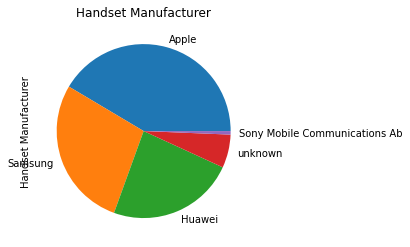

In [55]:
df_hand_set_man_counts.head(5).plot(kind='pie',  title="Handset Manufacturer");

#### Handset Type

In [43]:
df_hand_set_type_counts = df_telco_clean['Handset Type'].value_counts()
df_hand_set_type_counts

Huawei B528S-23A                             19373
Apple iPhone 6S (A1688)                       9369
Apple iPhone 6 (A1586)                        8967
unknown                                       8820
Apple iPhone 7 (A1778)                        6240
                                             ...  
Tcl Communicatio. Alcatel Pop4 6 4G 7070X        1
Lenovo Moto C                                    1
Fully Holdings (. Oukitel C2                     1
Lenovo Moto G (5Th Gen) Da12936945               1
Shenzhen Jeko Co. Blackview Bv5800 Pro           1
Name: Handset Type, Length: 1363, dtype: Int64

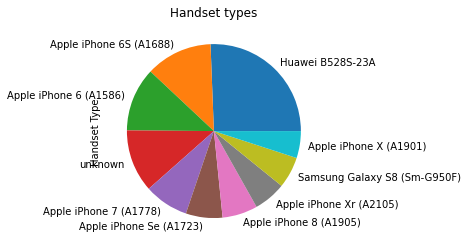

In [52]:
# my_plt.plotly_pie(df_telco_clean, 'Handset Type', 10)
df_hand_set_type_counts.head(10).plot(kind='pie',  title="Handset types");

#### Youtube Data Volume

In [56]:
df_telco_clean[['Youtube Data Volume (Bytes)']].describe()

,Youtube Data Volume (Bytes)
count,1.468870e+05
mean,2.264198e+07
std,9.244659e+06
min,1.296550e+05
25%,1.599692e+07
50%,2.266341e+07
75%,2.929351e+07
max,4.519008e+07


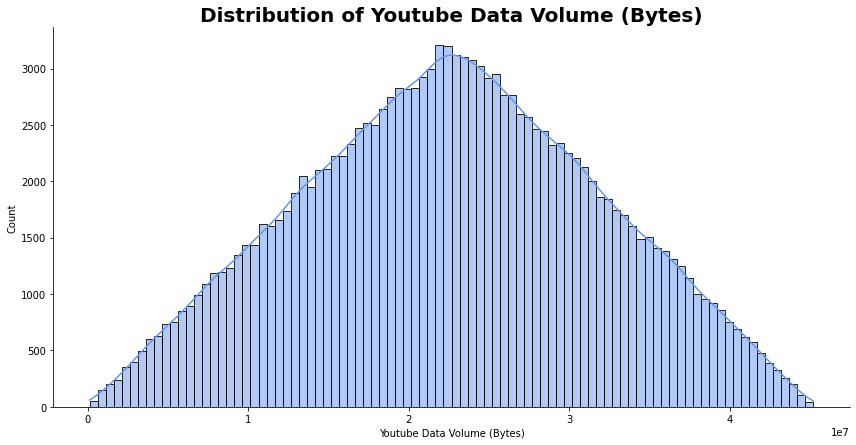

In [57]:
my_plt.hist(df_telco_clean, 'Youtube Data Volume (Bytes)')

#### Netflix Data Volume

In [58]:
df_telco_clean[['Netflix Data Volume (Bytes)']].describe()


,Netflix Data Volume (Bytes)
count,1.468870e+05
mean,2.262923e+07
std,9.259113e+06
min,9.843200e+04
25%,1.598200e+07
50%,2.263459e+07
75%,2.928806e+07
max,4.519815e+07


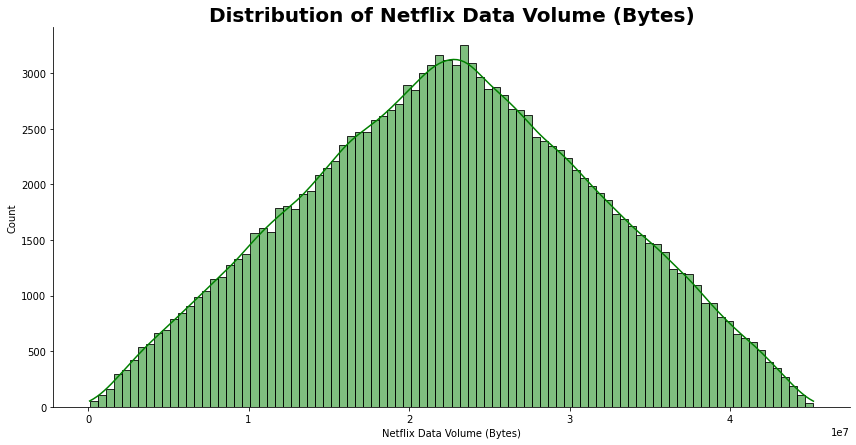

In [59]:
my_plt.hist(df_telco_clean, 'Netflix Data Volume (Bytes)', 'green')


#### Gaming Data Volume

In [60]:
df_telco_clean[['Gaming Data Volume (Bytes)']].describe()

,Gaming Data Volume (Bytes)
count,1.468870e+05
mean,4.303526e+08
std,2.440925e+08
min,3.063580e+05
25%,2.186904e+08
50%,4.316603e+08
75%,6.415752e+08
max,8.592028e+08


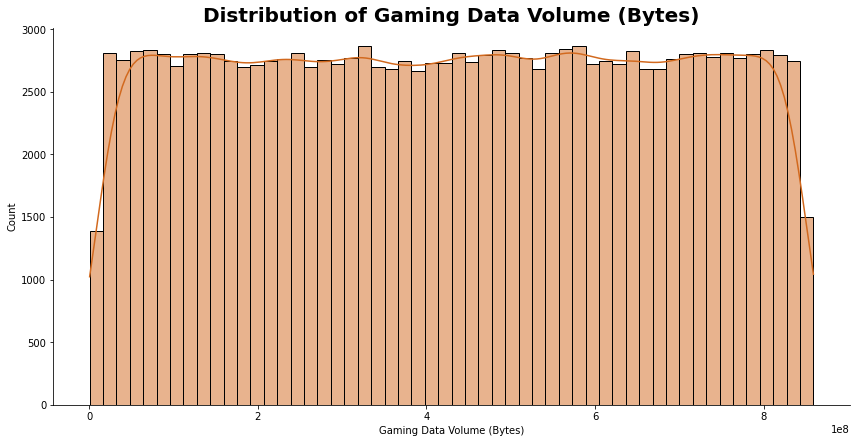

In [63]:
my_plt.hist(df_telco_clean, 'Gaming Data Volume (Bytes)', 'chocolate')

#### Email Data Volume

In [64]:
df_telco_clean[['Email Data Volume (Bytes)']].describe()

,Email Data Volume (Bytes)
count,1.468870e+05
mean,2.259087e+06
std,1.071133e+06
min,8.359000e+03
25%,1.359012e+06
50%,2.263890e+06
75%,3.159616e+06
max,4.518036e+06


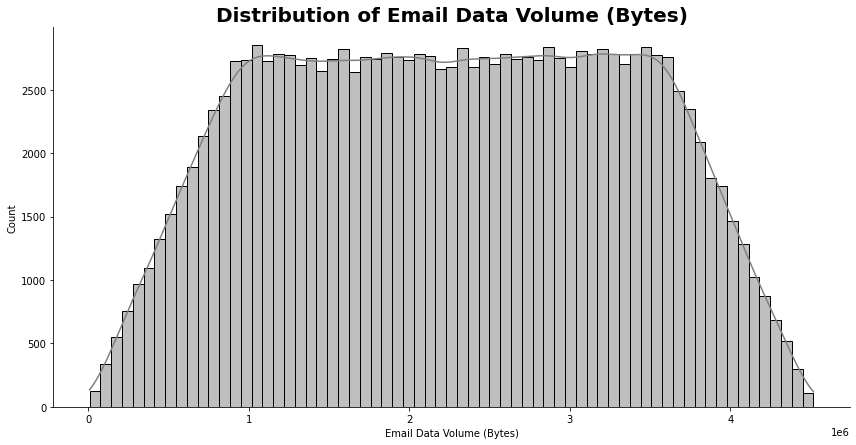

In [65]:
my_plt.hist(df_telco_clean, 'Email Data Volume (Bytes)', 'grey')


#### Google Data Volume

In [66]:
df_telco_clean[['Google Data Volume (Bytes)']].describe()


,Google Data Volume (Bytes)
count,1.468870e+05
mean,7.807976e+06
std,3.517132e+06
min,4.033000e+04
25%,4.943585e+06
50%,7.815531e+06
75%,1.068314e+07
max,1.552878e+07


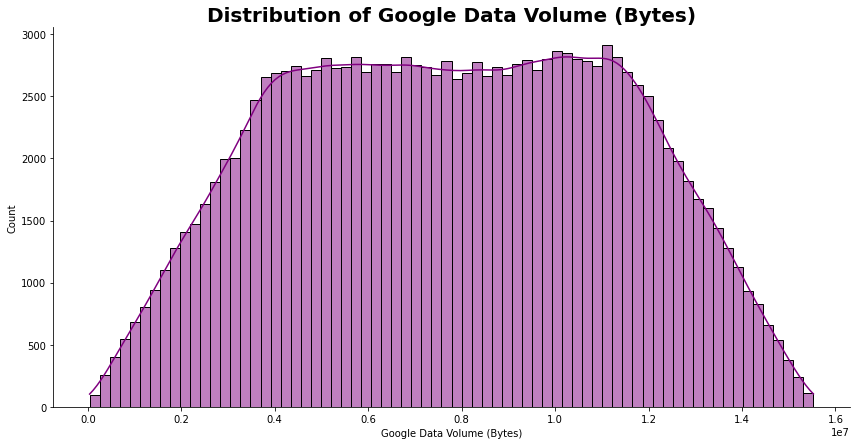

In [67]:
my_plt.hist(df_telco_clean, 'Google Data Volume (Bytes)', 'purple')


#### Social Media Data Volume

In [68]:
df_telco_clean[['Social Media Data Volume (Bytes)']].describe()

,Social Media Data Volume (Bytes)
count,1.468870e+05
mean,1.827736e+06
std,1.035571e+06
min,1.563000e+03
25%,9.313390e+05
50%,1.825390e+06
75%,2.727156e+06
max,3.650861e+06


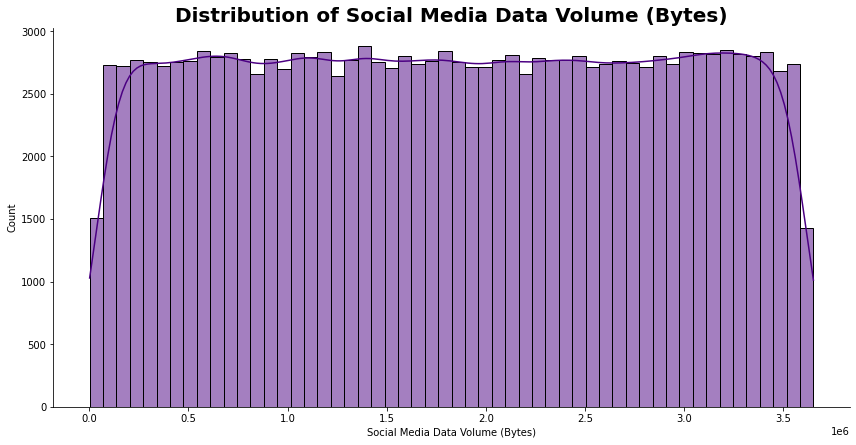

In [69]:
my_plt.hist(df_telco_clean, 'Social Media Data Volume (Bytes)', 'indigo')

#### Other Data Volume

In [70]:
df_telco_clean[['Other Data Volume (Bytes)']].describe()


,Other Data Volume (Bytes)
count,1.468870e+05
mean,4.292669e+08
std,2.432060e+08
min,1.490450e+05
25%,2.184772e+08
50%,4.297978e+08
75%,6.396625e+08
max,8.595209e+08


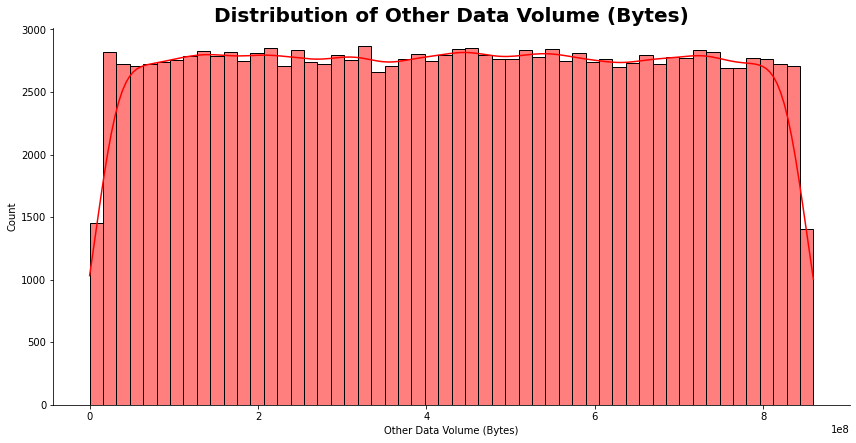

In [73]:
my_plt.hist(df_telco_clean, 'Other Data Volume (Bytes)', 'red')


#### Total Volume

In [74]:
df_telco_clean[['Total Data Volume (Bytes)']].describe()

,Total Data Volume (Bytes)
count,1.468870e+05
mean,4.957815e+08
std,2.444434e+08
min,2.895611e+07
25%,2.844777e+08
50%,4.969362e+08
75%,7.066379e+08
max,9.536316e+08


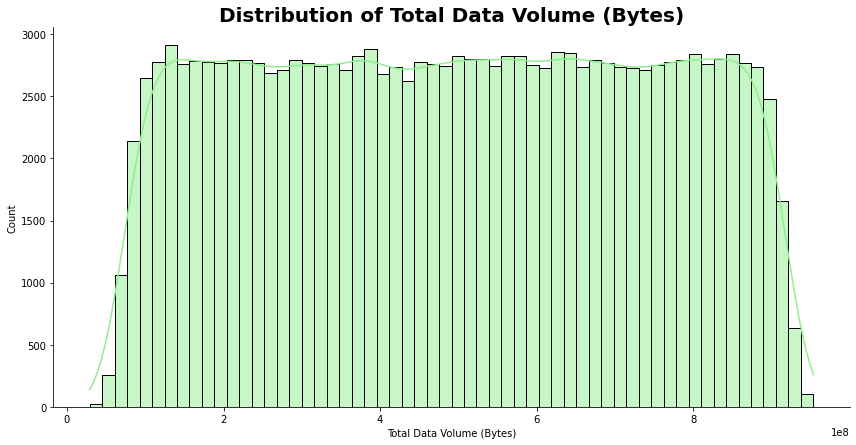

In [75]:
my_plt.hist(df_telco_clean, 'Total Data Volume (Bytes)', 'lightgreen')


### Bivariate Analysis

#### Youtube Data Volume Vs Total Data Volume

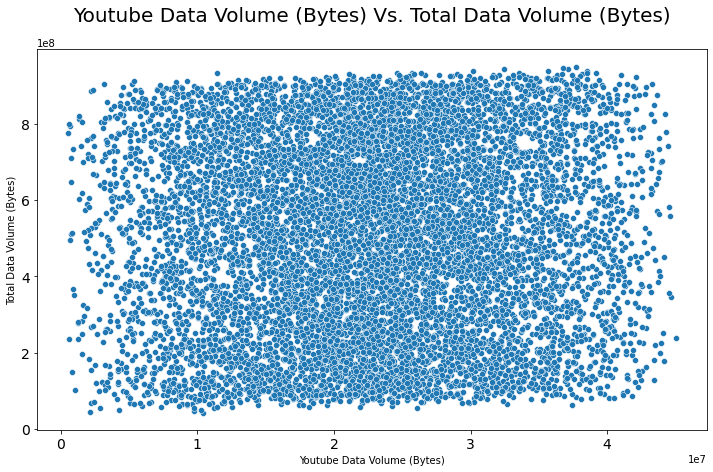

In [77]:
my_plt.scatter(df_telco_clean.sample(10000), 'Youtube Data Volume (Bytes)', 'Total Data Volume (Bytes)')

#### Netflix Data Volume Vs Total Data Volume 

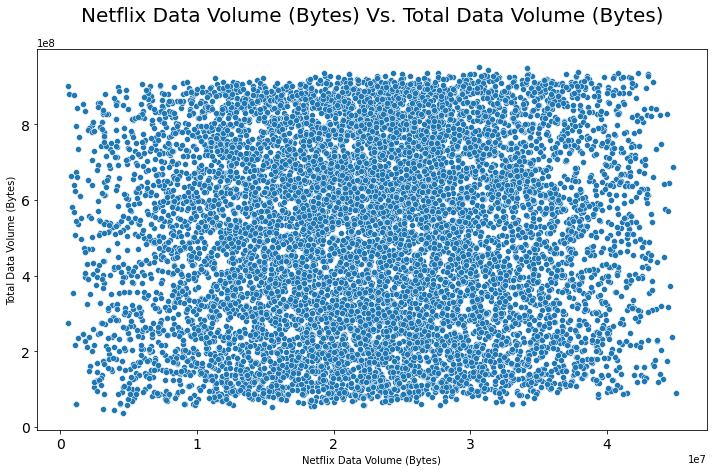

In [78]:
my_plt.scatter(df_telco_clean.sample(10000), 'Netflix Data Volume (Bytes)', 'Total Data Volume (Bytes)')

#### Gaming Data Volume Vs Total Data Volume

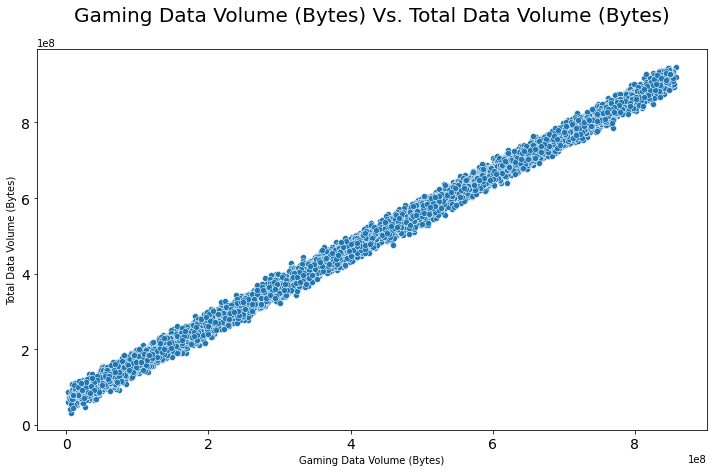

In [83]:
my_plt.scatter(df_telco_clean.sample(10000), 'Gaming Data Volume (Bytes)', 'Total Data Volume (Bytes)')

#### Email Data Volume Vs Total Data Volume

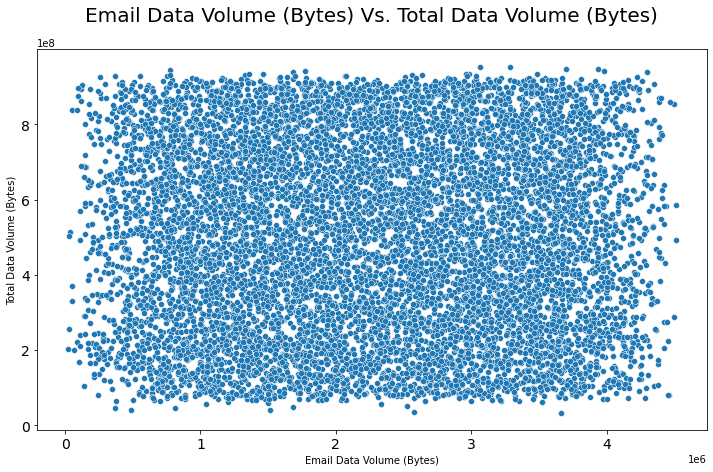

In [82]:
my_plt.scatter(df_telco_clean.sample(10000), 'Email Data Volume (Bytes)', 'Total Data Volume (Bytes)')

#### Google Data Volume Vs Total Data Volume 

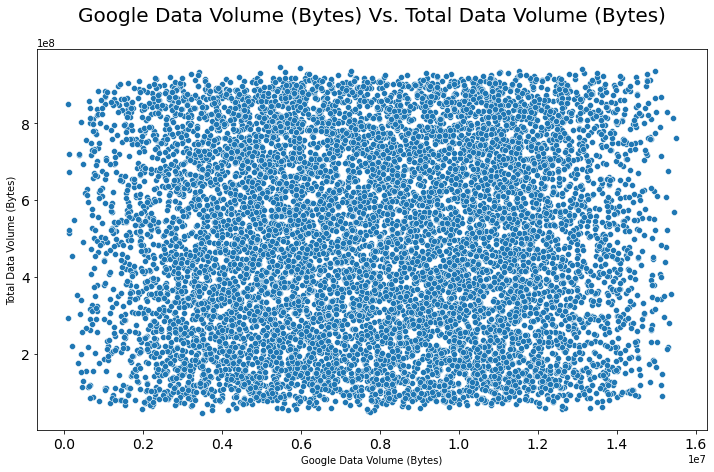

In [79]:
my_plt.scatter(df_telco_clean.sample(10000), 'Google Data Volume (Bytes)', 'Total Data Volume (Bytes)')

#### Social Media Data Volume Vs Total Data Volume 

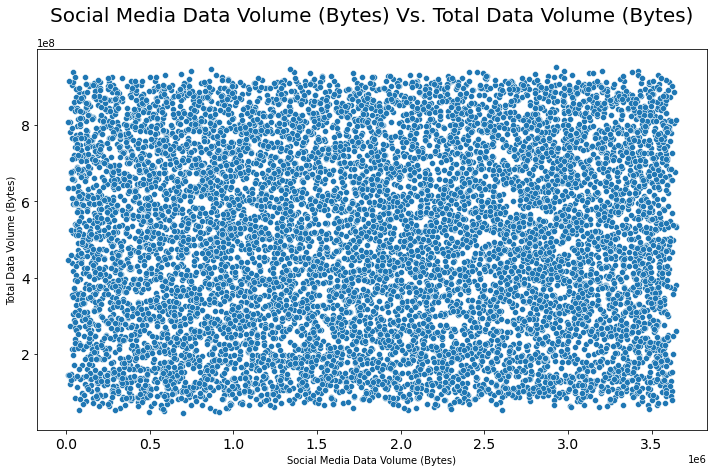

In [84]:
my_plt.scatter(df_telco_clean.sample(10000), 'Social Media Data Volume (Bytes)', 'Total Data Volume (Bytes)')

#### Other Data Volume Vs Total Data Volume 

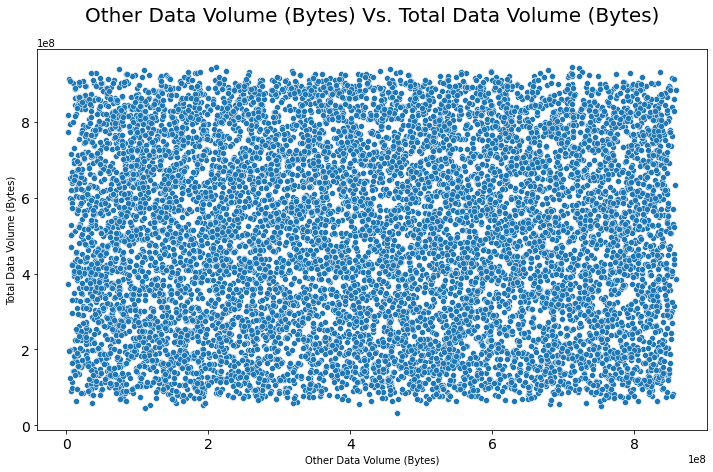

In [85]:
my_plt.scatter(df_telco_clean.sample(10000), 'Other Data Volume (Bytes)', 'Total Data Volume (Bytes)')


### Correlation Analysis

In [88]:
df_corr = df_telco_clean[[
    'Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)', 'Email Data Volume (Bytes)',
    'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)', 'Gaming Data Volume (Bytes)',
    'Other Data Volume (Bytes)']
].corr()
df_corr

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes)
Social Media Data Volume (Bytes),1.000000,-0.001933,0.004208,0.000570,0.001354,0.001894,0.005561
Google Data Volume (Bytes),-0.001933,1.000000,-0.000036,0.002172,-0.002018,-0.000800,-0.001268
Email Data Volume (Bytes),0.004208,-0.000036,1.000000,-0.003430,0.001518,0.000071,-0.000801
Youtube Data Volume (Bytes),0.000570,0.002172,-0.003430,1.000000,0.003604,-0.003674,0.003250
Netflix Data Volume (Bytes),0.001354,-0.002018,0.001518,0.003604,1.000000,-0.003546,-0.007924
Gaming Data Volume (Bytes),0.001894,-0.000800,0.000071,-0.003674,-0.003546,1.000000,-0.002814
Other Data Volume (Bytes),0.005561,-0.001268,-0.000801,0.003250,-0.007924,-0.002814,1.000000


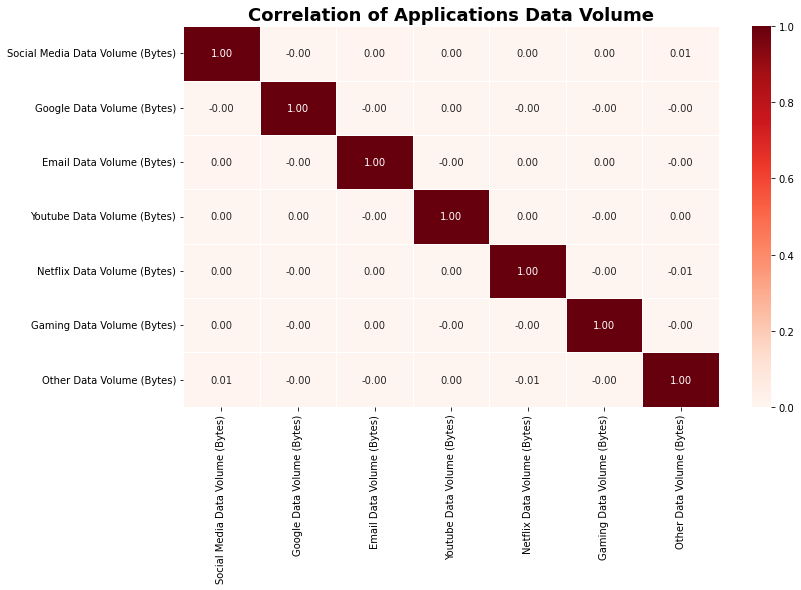

In [89]:
my_plt.heatmap(df_corr, "Correlation of Applications Data Volume")
#We can conclude that no correlation exist among the data usage applications

#### Handset Analysis

In [90]:
df_telco_clean['Handset Type'].value_counts().head(10)

Huawei B528S-23A                19373
Apple iPhone 6S (A1688)          9369
Apple iPhone 6 (A1586)           8967
unknown                          8820
Apple iPhone 7 (A1778)           6240
Apple iPhone Se (A1723)          5150
Apple iPhone 8 (A1905)           4961
Apple iPhone Xr (A2105)          4542
Samsung Galaxy S8 (Sm-G950F)     4404
Apple iPhone X (A1901)           3788
Name: Handset Type, dtype: Int64

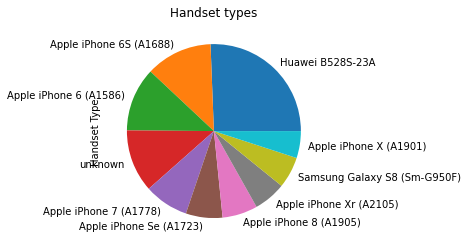

In [91]:
df_telco_clean['Handset Type'].value_counts().head(10).plot(kind='pie',  title="Handset types");

#### Handset Manufacturers

In [101]:
df_top_3_manf = df_telco_clean[['Handset Manufacturer']].value_counts().head(3)
df_top_3_manf

Handset Manufacturer
Apple                   59069
Samsung                 39902
Huawei                  33754
dtype: int64

<AxesSubplot:title={'center':'Top Handset Manufacturer'}, ylabel='None'>

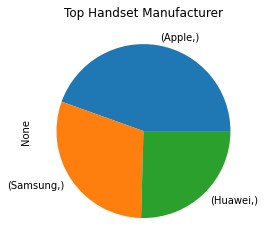

In [107]:
 df_telco_clean[['Handset Manufacturer']].value_counts().head(3).plot(kind='pie', title="Top Handset Manufacturer")

#### Top 5 Handsets of the top 3 Handset Manufacturers

In [108]:
df_top_3_manf = df_telco_clean['Handset Manufacturer'].value_counts().head(3)
df_top_3_manf

Apple      59069
Samsung    39902
Huawei     33754
Name: Handset Manufacturer, dtype: Int64

In [109]:
# Get top handsets of top handset manufacturers
df_top_3_manf = df_telco_clean[df_telco_clean["Handset Manufacturer"].isin(df_top_3_manf.index.tolist())]
top_handsets = df_top_3_manf['Handset Type'].groupby(df_telco_clean['Handset Manufacturer']).apply(lambda x: x.value_counts().head(5))
top_handsets

Handset Manufacturer                                
Apple                 Apple iPhone 6S (A1688)            9369
                      Apple iPhone 6 (A1586)             8967
                      Apple iPhone 7 (A1778)             6240
                      Apple iPhone Se (A1723)            5150
                      Apple iPhone 8 (A1905)             4961
Huawei                Huawei B528S-23A                  19373
                      Huawei E5180                       2062
                      Huawei P20 Lite Huawei Nova 3E     2000
                      Huawei P20                         1471
                      Huawei Y6 2018                      984
Samsung               Samsung Galaxy S8 (Sm-G950F)       4404
                      Samsung Galaxy A5 Sm-A520F         3673
                      Samsung Galaxy J5 (Sm-J530)        3664
                      Samsung Galaxy J3 (Sm-J330)        3431
                      Samsung Galaxy S7 (Sm-G930X)       3106
Name: Handset Typ

#### Number of xDR sessions of per user

In [111]:
number_of_xdr = df_telco_clean.groupby('MSISDN/Number')['MSISDN/Number'].agg('count').reset_index(name='Bearer Id').sort_values(by='Bearer Id',
        ascending=False)

number_of_xdr.rename(columns={number_of_xdr.columns[1]: 'number of xDR sessions'}, inplace=True)
number_of_xdr

,MSISDN/Number,number of xDR sessions
13379,33626320676,18
13035,33625779332,17
6353,33614892860,17
36666,33659725664,16
75561,33675877202,15
...,...,...
40613,33660669493,1
40612,33660669025,1
40610,33660668320,1
40609,33660668134,1


#### Average session duration per user

In [113]:
session_duration_per_user = df_telco_clean.groupby('MSISDN/Number').agg({'Dur (ms)': 'mean'})
session_duration_per_user.rename(
        columns={'Dur (ms)': 'Average session duration (ms)'}, inplace=True)
session_duration_per_user.sort_values(by=['Average session duration (ms)'], ascending=False).head(10)

,Average session duration (ms)
MSISDN/Number,
337000037000919,245108160.5
33762185850,245108160.5
33762190964,245108160.5
33667099979,245108160.5
33762199147,245108160.5
33667078134,245108160.5
33667077911,245108160.5
33762213743,245108160.5
33646337581,245108160.5


#### Total Data Volume Analysis

In [114]:
total_data = df_telco_clean.groupby('MSISDN/Number')[[ 'Total UL (Bytes)', 'Total DL (Bytes)', 'Total Data Volume (Bytes)']].sum()
total_data.nlargest(10, 'Total Data Volume (Bytes)')

,Total UL (Bytes),Total DL (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,
33614892860,689483001.0,8.156743e+09,8.846226e+09
33760536639,703478581.0,7.811295e+09,8.514774e+09
33625779332,729577380.0,7.770043e+09,8.499621e+09
33626320676,669650721.0,7.301517e+09,7.971167e+09
33675877202,581568792.0,7.309542e+09,7.891111e+09
33659725664,624260321.0,7.081602e+09,7.705863e+09
33666464084,405060976.0,6.903440e+09,7.308501e+09
33760413819,521518890.0,6.610852e+09,7.132371e+09
33664712899,471562882.0,6.400774e+09,6.872337e+09


#### Total data volumne of each application per user

In [116]:
apps_total = df_telco_clean.groupby('MSISDN/Number')[['Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)',
    'Email Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)',
    'Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)', 'Total Data Volume (Bytes)']].sum()
apps_total.nlargest(10, 'Total Data Volume (Bytes)')

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,,,,,,
33614892860,28294544.0,127973787.0,40788634.0,394370218.0,361401046.0,7.749432e+09,7.639264e+09,8.846226e+09
33760536639,39783189.0,123223099.0,33693767.0,396289198.0,334643269.0,7.461045e+09,4.716134e+09,8.514774e+09
33625779332,27135500.0,142307915.0,40633966.0,452958769.0,356980607.0,7.326673e+09,6.354583e+09,8.499621e+09
33626320676,43374779.0,152191852.0,42418782.0,374483047.0,328725740.0,6.887572e+09,8.167878e+09,7.971167e+09
33675877202,19222921.0,109860502.0,31514421.0,317410572.0,309093159.0,6.970568e+09,6.798515e+09,7.891111e+09
33659725664,35412358.0,116516345.0,35999792.0,257991088.0,399519079.0,6.725559e+09,6.317415e+09,7.705863e+09
33666464084,18629986.0,89320737.0,25557139.0,227336012.0,214416926.0,6.646303e+09,4.349141e+09,7.308501e+09
33760413819,20777205.0,82738720.0,25576965.0,303169107.0,318347546.0,6.268620e+09,4.101645e+09,7.132371e+09
33664712899,19390599.0,90389372.0,21426007.0,276834013.0,251798809.0,6.103856e+09,3.976960e+09,6.872337e+09
